# Predicting whether a person earns more than 50,000

### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import os

### Changing the directory to access the dataset

In [2]:
os.chdir('C:\\Users\\Sudarsanam S\\Python for DS\\Datasets\\Classification')

### Importing Data from CSV

In [3]:
data_income=pd.read_csv('income.csv')

## Data Understanding

### Checking out the imported data

In [4]:
data_income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


### Checking the dimensions of data(Rows and Columns)

In [5]:
data_income.shape

(31978, 13)

### Deep Copying the original dataset not to disturb the one

In [6]:
df = data_income.copy()

### Checking the information to get the number of non-null values and datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


### Checking the null values in the dataset in each columns

In [8]:
print('The count of null values in data is\n',df.isnull().sum())

The count of null values in data is
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


***Observations : No Nill values in the dataset***

### Checking descriptive statistics, gives clear view

In [9]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


***Observations :***
   1. The average age of the individual is aroung 39 years old.
   2. Only 25% of persons have a capital gain and capital loss of more than 0.
   3. On Average, individual spent around 40 hours in their work.

### Checking the number of records which had capital gain and capital loss

In [10]:
(df['capitalgain']==0).value_counts()

True     29320
False     2658
Name: capitalgain, dtype: int64

In [11]:
(df['capitalloss']==0).value_counts()

True     30495
False     1483
Name: capitalloss, dtype: int64

### Checking descriptive statistics for Object data type

In [12]:
df.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


***Observations : Understanding the categorical variables, by checking the count, number of unique values, most repeated values and the frequency of the same.***

### Listing the number of Job types with count of each

In [13]:
df['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

***Observations : Majority of the people in the dataset have Private Job type.***

### Checking the different Occupations with count of each

In [14]:
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

***Observations : It is found that both Job type and Occupation have "?", which is to be removed or replaced.***

### Checking unique values in JobType Column

In [15]:
print(np.unique(df['JobType']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [16]:
df['JobType'].nunique()

9

### Importing Data from CSV, replacing all ? with null

In [17]:
df=pd.read_csv('income.csv',na_values=[' ?'])

In [18]:
df.JobType.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [19]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

### Segregating the records, which has NaN in atleast one column

In [20]:
missing=(df[df.isna().any(axis=1)])

In [21]:
print(missing.shape)

(1816, 13)


### Dropping the records that contains null values

In [22]:
df1 = df.dropna(axis=0)

### Checking the dimensions of the data

In [23]:
df1.shape

(30162, 13)

### Understanding the correlation between the numerical data

In [24]:
corr = df1.corr(numeric_only=True)

In [25]:
corr

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


***Observations:***
   1. Older people work more hoursperweek as age and hoursperweek is positively correlated.
   2. Individuals who experience higher capital gains have slightly lower capital losses, and vice versa(Negative correlation).


In [26]:
df1.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

### Using cross tabulation for the EDA and Visualization on Categorical variables

In [27]:
pd.crosstab(index= df1['gender'],columns='count')

col_0,count
gender,
Female,9782
Male,20380


In [28]:
pd.crosstab(index= df1['gender'],columns='count',normalize=True)

col_0,count
gender,
Female,0.324315
Male,0.675685


In [29]:
pd.crosstab(index= df1['gender'],columns=df1['SalStat'],normalize=True)

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.036868,0.287448
Male,0.212055,0.463630


In [30]:
pd.crosstab(index= df1['gender'],columns=df1['SalStat'],margins=True,normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


In [31]:
pd.crosstab(index= df1['gender'],columns=df1['SalStat'],margins=True,normalize='columns')

SalStat,"greater than 50,000","less than or equal to 50,000",All
gender,,,
Female,0.148109,0.382714,0.324315
Male,0.851891,0.617286,0.675685


In [32]:
pd.crosstab(index= df1['gender'],columns=df1['SalStat'],margins=True,normalize=True)

SalStat,"greater than 50,000","less than or equal to 50,000",All
gender,,,
Female,0.036868,0.287448,0.324315
Male,0.212055,0.463630,0.675685
All,0.248922,0.751078,1.000000


## Data Visualization

<AxesSubplot: xlabel='SalStat', ylabel='count'>

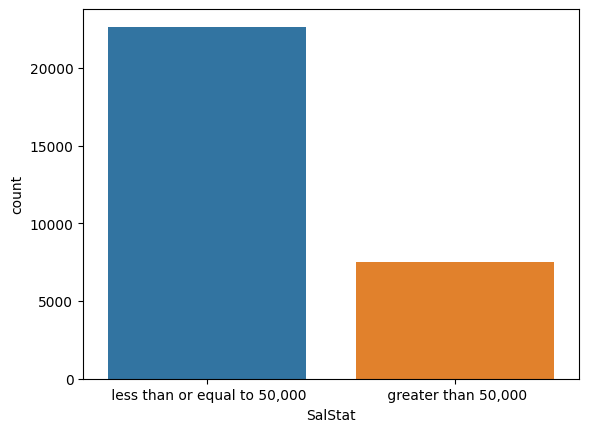

In [33]:
sns.countplot(x=df1['SalStat'])

<AxesSubplot: xlabel='SalStat', ylabel='count'>

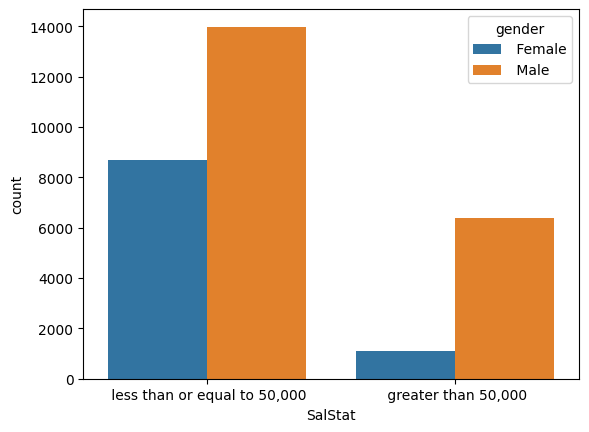

In [34]:
sns.countplot(x=df1['SalStat'],hue=df1['gender'])

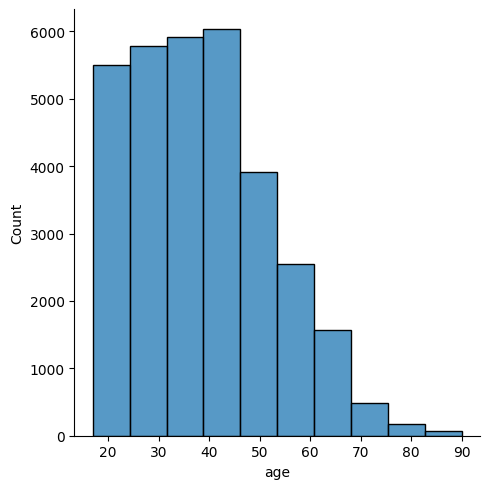

In [35]:
sns.displot(df['age'],bins=10)

<AxesSubplot: xlabel='SalStat', ylabel='age'>

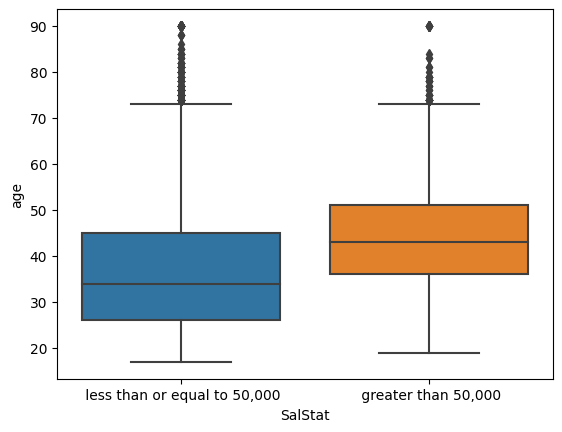

In [36]:
sns.boxplot(data=df1,x='SalStat',y='age')

<AxesSubplot: xlabel='SalStat', ylabel='age'>

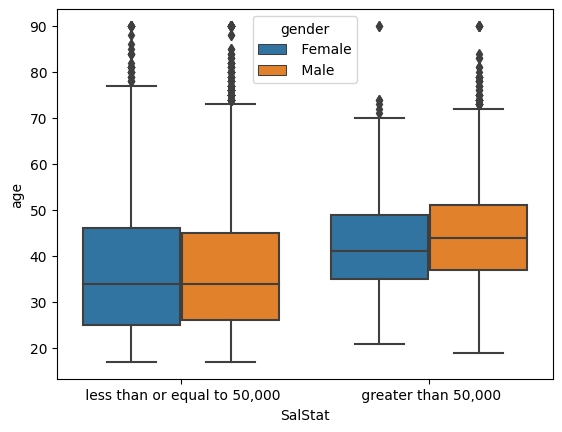

In [37]:
sns.boxplot(data=df1,x='SalStat',y='age',hue='gender')

In [38]:
df1.groupby('SalStat')['age'].mean()

SalStat
 greater than 50,000             43.95911
 less than or equal to 50,000    36.60806
Name: age, dtype: float64

In [39]:
df1.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

<AxesSubplot: xlabel='count', ylabel='JobType'>

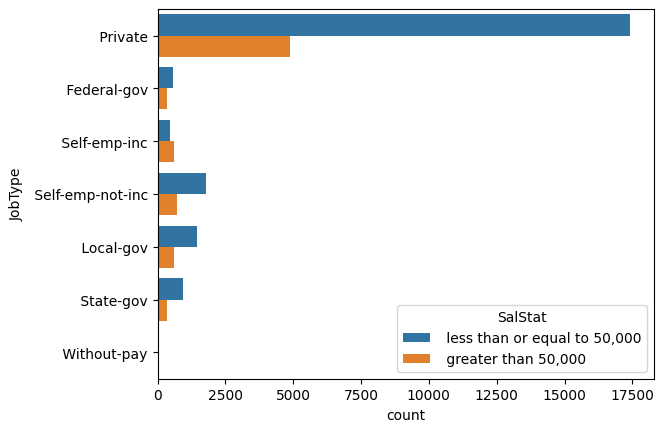

In [40]:
sns.countplot(data=df1,y=df1['JobType'],hue=df1['SalStat'])

#### Different Approach : Creating Table for visualizing the data

In [41]:
count_data = df1.groupby(['JobType', 'SalStat']).size().reset_index(name='Count')
count_data

,JobType,SalStat,Count
0,Federal-gov,"greater than 50,000",365
1,Federal-gov,"less than or equal to 50,000",578
2,Local-gov,"greater than 50,000",609
3,Local-gov,"less than or equal to 50,000",1458
4,Private,"greater than 50,000",4876
5,Private,"less than or equal to 50,000",17410
6,Self-emp-inc,"greater than 50,000",600
7,Self-emp-inc,"less than or equal to 50,000",474
8,Self-emp-not-inc,"greater than 50,000",714
9,Self-emp-not-inc,"less than or equal to 50,000",1785


<AxesSubplot: xlabel='Count', ylabel='JobType'>

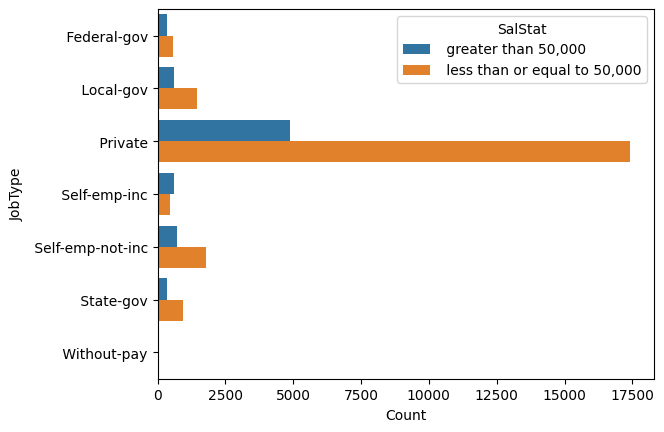

In [42]:
sns.barplot(data=count_data, y='JobType', x='Count', hue='SalStat')

In [43]:
df1.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


### Stopping pandas to show warning on chained assignment

In [44]:
pd.options.mode.chained_assignment = None  # default='warn'

### Data Preprocessing for Logistic Regression model

In [45]:
df1['SalStat']=df1['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

In [46]:
df1

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


## Building the logistic regression model with all features

### Creating dummy numeric values for categorical variables

In [47]:
df2=pd.get_dummies(df1,drop_first=True)

In [48]:
df2

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
Coln = list(df2.columns)

In [50]:
Coln

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

### Getting only the features of the dataset, removing the target variable

In [51]:
features = list(set(Coln)-set(['SalStat']))

In [52]:
features

['nativecountry_ Holand-Netherlands',
 'occupation_ Exec-managerial',
 'nativecountry_ Ireland',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'EdType_ HS-grad',
 'nativecountry_ Hong',
 'nativecountry_ Taiwan',
 'nativecountry_ Mexico',
 'nativecountry_ Iran',
 'relationship_ Other-relative',
 'nativecountry_ China',
 'relationship_ Own-child',
 'nativecountry_ Japan',
 'nativecountry_ Portugal',
 'nativecountry_ Thailand',
 'nativecountry_ Trinadad&Tobago',
 'EdType_ 5th-6th',
 'nativecountry_ Canada',
 'nativecountry_ Scotland',
 'EdType_ Prof-school',
 'JobType_ Self-emp-inc',
 'occupation_ Prof-specialty',
 'nativecountry_ Puerto-Rico',
 'maritalstatus_ Never-married',
 'occupation_ Armed-Forces',
 'relationship_ Not-in-family',
 'nativecountry_ Poland',
 'nativecountry_ Hungary',
 'relationship_ Unmarried',
 'maritalstatus_ Separated',
 'relationship_ Wife',
 'occupation_ Sales',
 'nativecountry_ India',
 'maritalstatus_ Married-civ-spouse',
 'EdType_ 11th',
 'gender_ Male',
 'm

### Storing the values of target in variable y

In [53]:
y_all=df2['SalStat'].values

In [54]:
y_all

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Storing the values of features in variable x

In [55]:
x_all=df2[features].values

In [56]:
x_all

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

### Splitting the data into train and test dataset

In [57]:
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_all, y_all, test_size=0.3, random_state=0)

### Logistic Regression model(Using liblinear solver, as the dimension of the dataset is more)

In [58]:
logistic = LogisticRegression(solver='liblinear')

In [59]:
logistic.fit(x_train_all,y_train_all)

LogisticRegression(solver='liblinear')

### Checking the coefficents and intercept from the model

In [60]:
logistic.coef_

array([[-3.10790851e-03,  6.84773830e-01, -9.40484224e-03,
        -6.38406679e-02, -3.65325916e-01, -2.54026740e-02,
        -2.71616179e-02, -8.81600449e-01, -3.56185958e-02,
        -8.85808220e-01, -2.25690491e-01, -1.63033086e+00,
         1.43582711e-02, -9.69129251e-02, -2.78173074e-02,
        -7.89631726e-03, -6.99951482e-01,  6.53301720e-02,
        -3.94350579e-02,  1.21663052e+00, -3.77466038e-01,
         4.28901882e-01, -2.69039545e-01, -6.07989710e-01,
        -1.75424586e-02, -8.04786965e-01, -5.95422636e-02,
        -2.08800884e-02, -9.00533571e-01, -3.96858117e-01,
         9.98672059e-01,  5.19902382e-02, -2.53453622e-01,
         7.86915804e-01, -9.03687647e-01,  6.76609231e-01,
        -1.19342720e-01, -6.22536218e-02, -1.13737076e+00,
        -1.30495392e-02, -4.58552534e-01, -1.11137965e-01,
        -5.47567454e-02,  6.43565567e-04, -3.42210239e-01,
        -4.00618158e-01,  1.83585166e-01, -4.75422352e-02,
         1.05992595e-01,  3.12681966e-04, -4.02348902e-0

### Checking the intercept from the model

In [61]:
logistic.intercept_

array([-3.03632113])

### Predicting the target values, by giving x_test as input on built model

In [62]:
predictions_all = logistic.predict(x_test_all)

In [63]:
predictions_all

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
y_test_all

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Checking the confusion matrix to find the performance of the classification model

In [65]:
conf_matrix_log_all = confusion_matrix(y_test_all,predictions_all)

In [66]:
print(conf_matrix_log_all)

[[6332  491]
 [ 936 1290]]


### Checking the accuracy score of the logistic model

In [67]:
acc_log_all =accuracy_score(y_test_all,predictions_all)

In [68]:
acc_log_all

0.8423030169079456

### Checking the number of misclassified values of the model

In [69]:
print('Misclassified : ',(y_test_all!=predictions_all).sum())

Misclassified :  1427


In [70]:
df1

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


## Building a logistic model by removing Insignificant variables

In [71]:
cols = ['gender','nativecountry','race','JobType']

In [72]:
cols

['gender', 'nativecountry', 'race', 'JobType']

In [73]:
df2=df1.drop(cols,axis=1)

In [74]:
df2.head()

,age,EdType,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,0,0,28,0
1,24,HS-grad,Never-married,Armed-Forces,Own-child,0,0,40,0
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,0,0,40,1
3,27,9th,Never-married,Craft-repair,Other-relative,0,0,40,0
4,20,Some-college,Never-married,Sales,Not-in-family,0,0,35,0


In [75]:
df2.shape

(30162, 9)

In [76]:
df2=pd.get_dummies(df2,drop_first=True)

In [77]:
df2.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [78]:
columns_list = list(df2.columns)

In [79]:
features = list(set(columns_list)-set(['SalStat']))
print(features)

['capitalgain', 'EdType_ 1st-4th', 'occupation_ Exec-managerial', 'EdType_ HS-grad', 'EdType_ 7th-8th', 'occupation_ Priv-house-serv', 'relationship_ Other-relative', 'EdType_ Assoc-voc', 'relationship_ Own-child', 'EdType_ 5th-6th', 'EdType_ Assoc-acdm', 'EdType_ Doctorate', 'EdType_ Prof-school', 'EdType_ Some-college', 'occupation_ Prof-specialty', 'maritalstatus_ Never-married', 'occupation_ Armed-Forces', 'relationship_ Not-in-family', 'relationship_ Unmarried', 'maritalstatus_ Separated', 'relationship_ Wife', 'occupation_ Sales', 'EdType_ Preschool', 'maritalstatus_ Married-civ-spouse', 'occupation_ Tech-support', 'occupation_ Other-service', 'EdType_ 11th', 'EdType_ Masters', 'EdType_ Bachelors', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Widowed', 'hoursperweek', 'EdType_ 9th', 'occupation_ Farming-fishing', 'occupation_ Craft-repair', 'occupation_ Handlers-cleaners', 'age', 'occupation_ Machine-op-inspct', 'capitalloss', 'occupation_ Protective-serv', 'occupation

In [80]:
y_less=df2['SalStat'].values
print(y_less)

[0 0 1 ... 0 0 0]


In [81]:
x_less=df2[features].values
print(x_less)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Splitting the data into train and test dataset

In [82]:
x_train_less, x_test_less, y_train_less, y_test_less = train_test_split(x_less, y_less, test_size=0.3, random_state=0)

### Logistic Regression model(Using liblinear solver, as the dimension of the dataset is more)

In [83]:
logistic_less = LogisticRegression(solver='liblinear')

In [84]:
logistic_less.fit(x_train_less,y_train_less)

LogisticRegression(solver='liblinear')

### Predicting the target values, by giving x_test as input on built model

In [85]:
predictions_less = logistic_less.predict(x_test_less)
predictions_less

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Checking the confusion matrix to find the performance of the classification model

In [86]:
conf_matrix_log_less = confusion_matrix(y_test_all,predictions_less)

In [87]:
print(conf_matrix_log_less)

[[6317  506]
 [ 952 1274]]


### Checking the accuracy score of the logistic model

In [88]:
acc_log_less = accuracy_score(y_test_less,predictions_less)
print(acc_log_less)

0.8388772240026522


***Observations : The accuracy score of the logistic regression model built without removing insignificant variables performs well than the model built with the dataset removing insignificant variables, so we can stick with the dataset(without removing insignificant variables)***

### Checking the number of misclassified values of the model

In [89]:
print('Misclassified : ',(y_test_all!=predictions_all).sum())

Misclassified :  1427


## Building a K Nearest Neighbors model with all featues

In [90]:
KNN_all= KNeighborsClassifier(n_neighbors=16)

In [91]:
KNN_all.fit(x_train_all,y_train_all)

KNeighborsClassifier(n_neighbors=16)

### Predicting the target values, by giving x_test as input on built model

In [92]:
pred_all = KNN_all.predict(x_test_all)

In [93]:
pred_all

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Checking the confusion matrix to find the performance of the classification model

In [94]:
conf_matrix_knn_all = confusion_matrix(y_test_all,pred_all)
print(conf_matrix_knn_all)

[[6412  411]
 [ 979 1247]]


### Checking the accuracy score of the KNN model

In [95]:
acc_knn_all =accuracy_score(y_test_all,pred_all)
print(acc_knn_all)

0.8463918665045861


### Checking the number of misclassified values of the model

In [96]:
print('Misclassified : ',(y_test_all!=pred_all).sum())

Misclassified :  1390


### Calculating the error for K values between 1 and 20 to check for which K value, model performs well

In [97]:
Misclassified_sample_all=[]

In [98]:
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_all,y_train_all)
    pred_i_all=knn.predict(x_test_all)
    Misclass_all = (y_test_all!=pred_i_all).sum()
    Misclassified_sample_all.append(Misclass_all)
    print('Misclassified sample for k=',i,'is : ',Misclass_all)

Misclassified sample for k= 1 is :  1766
Misclassified sample for k= 2 is :  1516
Misclassified sample for k= 3 is :  1515
Misclassified sample for k= 4 is :  1436
Misclassified sample for k= 5 is :  1493
Misclassified sample for k= 6 is :  1438
Misclassified sample for k= 7 is :  1451
Misclassified sample for k= 8 is :  1432
Misclassified sample for k= 9 is :  1458
Misclassified sample for k= 10 is :  1436
Misclassified sample for k= 11 is :  1441
Misclassified sample for k= 12 is :  1447
Misclassified sample for k= 13 is :  1451
Misclassified sample for k= 14 is :  1423
Misclassified sample for k= 15 is :  1413
Misclassified sample for k= 16 is :  1390
Misclassified sample for k= 17 is :  1424
Misclassified sample for k= 18 is :  1396
Misclassified sample for k= 19 is :  1434
Misclassified sample for k= 20 is :  1426


In [99]:
print(Misclassified_sample_all)

[1766, 1516, 1515, 1436, 1493, 1438, 1451, 1432, 1458, 1436, 1441, 1447, 1451, 1423, 1413, 1390, 1424, 1396, 1434, 1426]


## Building a K Nearest Neighbors model removing insignificant variables

In [100]:
KNN_less= KNeighborsClassifier(n_neighbors=11)

In [101]:
KNN_less.fit(x_train_less,y_train_less)

KNeighborsClassifier(n_neighbors=11)

### Predicting the target values, by giving x_test as input on built model

In [102]:
pred_less = KNN_less.predict(x_test_less)

In [103]:
pred_less

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Checking the confusion matrix to find the performance of the classification model

In [104]:
conf_matrix_knn_less=confusion_matrix(y_test_less,pred_less)
conf_matrix_knn_less

array([[6311,  512],
       [ 901, 1325]], dtype=int64)

### Checking the accuracy score of the KNN model

In [105]:
acc_knn_less = accuracy_score(y_test_less,pred_less)
print(acc_knn_less)

0.8438501491877556


### Checking the number of misclassified values of the model

In [106]:
print('Misclassified : ',(y_test_less!=pred_less).sum())

Misclassified :  1413


### Calculating the error for K values between 1 and 20 to check for which K value, model performs well

In [107]:
Misclassified_sample_less=[]

In [108]:
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_less,y_train_less)
    pred_i_less=knn.predict(x_test_less)
    Misclass_less = (y_test_less!=pred_i_less).sum()
    Misclassified_sample_less.append(Misclass_less)
    print('Misclassified sample for k=',i,'is : ',Misclass_less)

Misclassified sample for k= 1 is :  1723
Misclassified sample for k= 2 is :  1512
Misclassified sample for k= 3 is :  1541
Misclassified sample for k= 4 is :  1480
Misclassified sample for k= 5 is :  1490
Misclassified sample for k= 6 is :  1442
Misclassified sample for k= 7 is :  1467
Misclassified sample for k= 8 is :  1433
Misclassified sample for k= 9 is :  1437
Misclassified sample for k= 10 is :  1416
Misclassified sample for k= 11 is :  1413
Misclassified sample for k= 12 is :  1434
Misclassified sample for k= 13 is :  1437
Misclassified sample for k= 14 is :  1445
Misclassified sample for k= 15 is :  1426
Misclassified sample for k= 16 is :  1420
Misclassified sample for k= 17 is :  1438
Misclassified sample for k= 18 is :  1423
Misclassified sample for k= 19 is :  1441
Misclassified sample for k= 20 is :  1431


In [109]:
print(Misclassified_sample_less)

[1723, 1512, 1541, 1480, 1490, 1442, 1467, 1433, 1437, 1416, 1413, 1434, 1437, 1445, 1426, 1420, 1438, 1423, 1441, 1431]


In [110]:
print ('Accuracy of Logistic Model: With all features : ', acc_log_all)
print ('Accuracy of Logistic Model: Removing insignificant featues : ',acc_log_less)
print('Accuracy of KNN Model: With all features : ', acc_knn_all)
print('Accuracy of KNN Model: Removing insignificant featues : ', acc_knn_less)

Accuracy of Logistic Model: With all features :  0.8423030169079456
Accuracy of Logistic Model: Removing insignificant featues :  0.8388772240026522
Accuracy of KNN Model: With all features :  0.8463918665045861
Accuracy of KNN Model: Removing insignificant featues :  0.8438501491877556


***Overall Observations : Overall, both logistic and KNN model performs more or less the same. By comparing the accuracy of the model, we can come into conclusion that, KNN model outperforms Logistic regression model.***
